# Modèle de Régression Polynomiale Multivariée

Dans ce devoir, nous allons développer un modèle de régression polynomiale 'from scratch' de degré 2 pour prédire les ventes en fonction des dépenses publicitaires en TV, Radio et Newspapers du dataset 'Advertising'. Ensuite, nous comparerons les résultats avec le modèle de régression linéaire multiple que vous avez déjà développé pour déterminer quel modèle choisir.

## Consignes :

1. **Développement du Modèle de Régression Polynomiale 'From Scratch' :**
   - Implémenter un modèle de régression polynomiale 'from scratch' de degré 2 en utilisant les dépenses publicitaires en TV, Radio et Newspapers comme variables prédictives pour prédire les ventes.
   
2. **Comparaison des Résultats :**
   - Comparer les performances du modèle de régression polynomiale avec celui du modèle de régression linéaire multiple que vous avez déjà développé. Vous pouvez comparer les performances en utilisant des métriques telles que l'erreur quadratique moyenne (MSE), l'erreur absolue moyenne (MAE), ou toute autre métrique pelement,
[Votre Nom]


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## 1. Dataset
Chargement du dataset Iris pour effectuer les prédictions de la largeur des pétales en fonction de longueur des pétales

In [2]:
file_path = r'dataSets\Advertising.csv'
dataset = pd.read_csv(file_path)
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


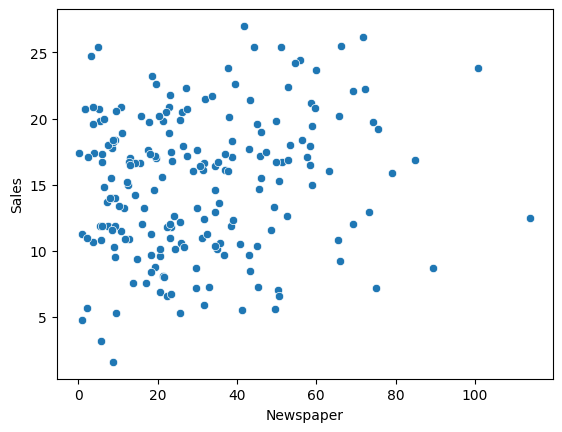

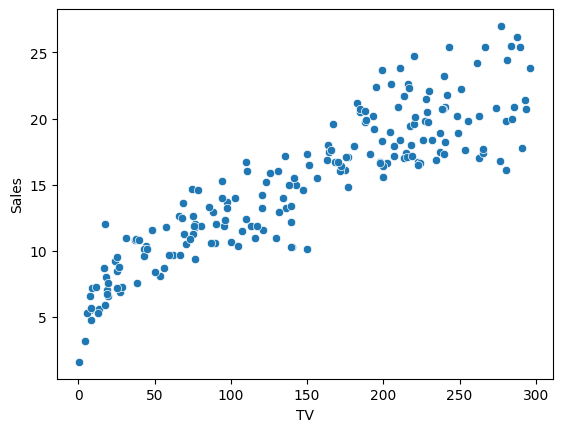

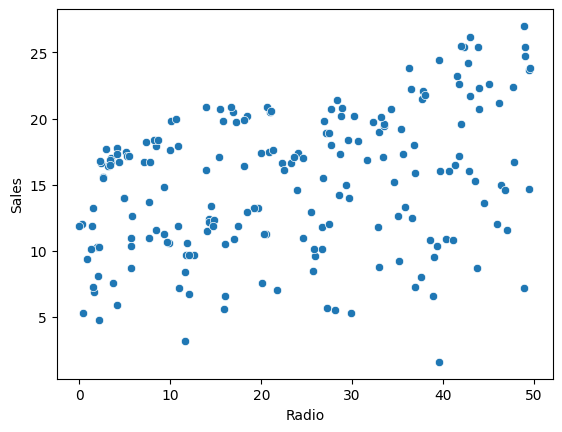

In [4]:
sns.scatterplot(x='Newspaper', y='Sales', data=dataset)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

# Plot for TV vs Sales
sns.scatterplot(x='TV', y='Sales', data=dataset)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

# Plot for Radio vs Sales
sns.scatterplot(x='Radio', y='Sales', data=dataset)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

In [5]:
X=dataset[['Radio','TV','Newspaper']].values
X

array([[ 37.8, 230.1,  69.2],
       [ 39.3,  44.5,  45.1],
       [ 45.9,  17.2,  69.3],
       [ 41.3, 151.5,  58.5],
       [ 10.8, 180.8,  58.4],
       [ 48.9,   8.7,  75. ],
       [ 32.8,  57.5,  23.5],
       [ 19.6, 120.2,  11.6],
       [  2.1,   8.6,   1. ],
       [  2.6, 199.8,  21.2],
       [  5.8,  66.1,  24.2],
       [ 24. , 214.7,   4. ],
       [ 35.1,  23.8,  65.9],
       [  7.6,  97.5,   7.2],
       [ 32.9, 204.1,  46. ],
       [ 47.7, 195.4,  52.9],
       [ 36.6,  67.8, 114. ],
       [ 39.6, 281.4,  55.8],
       [ 20.5,  69.2,  18.3],
       [ 23.9, 147.3,  19.1],
       [ 27.7, 218.4,  53.4],
       [  5.1, 237.4,  23.5],
       [ 15.9,  13.2,  49.6],
       [ 16.9, 228.3,  26.2],
       [ 12.6,  62.3,  18.3],
       [  3.5, 262.9,  19.5],
       [ 29.3, 142.9,  12.6],
       [ 16.7, 240.1,  22.9],
       [ 27.1, 248.8,  22.9],
       [ 16. ,  70.6,  40.8],
       [ 28.3, 292.9,  43.2],
       [ 17.4, 112.9,  38.6],
       [  1.5,  97.2,  30. ],
       [ 2

In [6]:
Y=dataset[['Sales']].values
Y

array([[22.1],
       [10.4],
       [12. ],
       [16.5],
       [17.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [15.6],
       [12.6],
       [17.4],
       [ 9.2],
       [13.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [17.5],
       [ 5.6],
       [20.5],
       [ 9.7],
       [17. ],
       [15. ],
       [20.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [13.2],
       [17.4],
       [11.9],
       [17.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [17.9],
       [ 8.5],
       [16.1],
       [10.6],
       [23.2],
       [19.8],
       [ 9.7],
       [16.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [20.7],
       [14. ],
       [16. ],
       [11.3],
       [11

In [7]:
print (X.shape)
print (Y.shape)

(200, 3)
(200, 1)


In [8]:
Y = Y.reshape(Y.shape[0], 1)

In [9]:
X.shape

(200, 3)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
X.shape

(200, 3)

In [12]:
scaler = StandardScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [13]:

X_train_norm = np.hstack((X_train_norm,
               X_train_norm[:,0:1]**2,
               X_train_norm[:,1:2]**2,
               X_train_norm[:,2:3]**2,
               X_train_norm[:,0:1]*X_train_norm[:,1:2],
               X_train_norm[:,0:1]*X_train_norm[:,2:3],
               X_train_norm[:,1:2]*X_train_norm[:,2:3],
               np.ones((X_train_norm.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)


In [14]:
X_test_norm = np.hstack((X_test_norm,
               X_test_norm[:,0:1]**2,
               X_test_norm[:,1:2]**2,
               X_test_norm[:,2:3]**2,
               X_test_norm[:,0:1]*X_test_norm[:,1:2],
               X_test_norm[:,0:1]*X_test_norm[:,2:3],
               X_test_norm[:,1:2]*X_test_norm[:,2:3],
               np.ones((X_test_norm.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)


In [15]:
print (X.shape) 
print(X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(200, 3)
(40, 3)
(160, 1)
(40, 1)


In [16]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(10,1)
print('Theta:',theta)

Theta: [[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]]


In [17]:
def model(X, theta):
    return X.dot(theta)

In [18]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [19]:
print(X.shape, Y_train.shape)

(200, 3) (160, 1)


In [21]:
cost_function(X_train_norm, Y_train, theta)

85.57038163607669

In [22]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [23]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [24]:
print(X_train_norm.shape)

(160, 10)


In [25]:
n_iterations = 10000
learning_rate = 0.03

theta_final, cost_history = gradient_descent(X_train_norm, Y_train, theta, learning_rate, n_iterations)

In [26]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions_test = model(X_test_norm, theta_final)
predictions_train = model(X_train_norm, theta_final)

theta_final

array([[ 1.50531882],
       [ 4.48371939],
       [ 0.06329735],
       [ 0.31545407],
       [-0.74933164],
       [ 0.03504415],
       [ 0.51983801],
       [ 0.04927631],
       [-0.04357516],
       [15.68316222]])

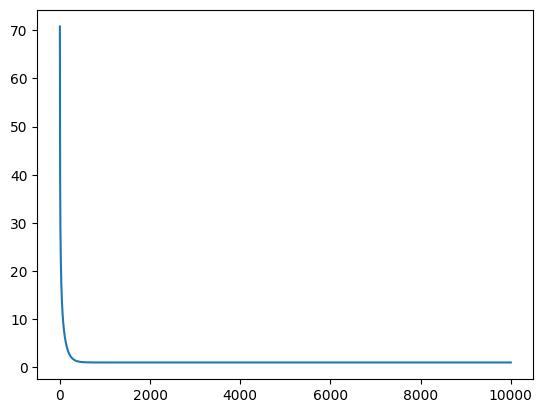

In [27]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [28]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [32]:
coef_determination(Y_test, predictions_test)

0.95331743410748

In [31]:
coef_determination(Y_train, predictions_train)

0.9288133512730626

In [39]:
import pandas as pd

# Create a dictionary with the data
data = {
    'Model': ['Polynomial Regression Test', 'Polynomial Regression Train', 'Linear Regression'],
    'Score': [0.95331743410748, 0.9288133512730626, 0.8096823809432807]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame
df


,Model,Score
0,Polynomial Regression Test,0.953317
1,Polynomial Regression Train,0.928813
2,Linear Regression,0.809682
